In [21]:
import pandas as pd
import numpy as np

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [23]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPool1D,Bidirectional,LSTM,Dropout,TimeDistributed
from keras.layers import Dense,GlobalAveragePooling2D

In [24]:
import matplotlib.pyplot as plt


In [25]:
filename = 'NSEI'
stock = pd.read_csv(filename + '.csv')

In [26]:
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock.iloc[:,1:4])
stock.iloc[:,1:4] = scaled_values

In [27]:
y_scaler = preprocessing.MinMaxScaler()
scaled_values = y_scaler.fit_transform(np.array(stock.iloc[:,4]).reshape(-1,1))
stock.iloc[:,4] = scaled_values

In [28]:
scaler = preprocessing.MinMaxScaler()
scaled_values = scaler.fit_transform(stock.iloc[:,5:])
stock.iloc[:,5:] = scaled_values

In [39]:
window_size = 50
X = []
Y = []

for i in range(0 , len(stock) - window_size -1 , 1):
    X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(window_size,1))
    Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))

In [40]:
train_X,temp_X,train_label,temp_label = train_test_split(X, Y, test_size=0.1,shuffle=False)


In [42]:
test_X, val_X, test_label, val_lablr = train_test_split(temp_X, temp_label, test_size=0.5, random_state=42)


In [43]:
train_X = np.array(train_X)
test_X = np.array(test_X)
train_label = np.array(train_label)
test_label = np.array(test_label)

399

In [44]:
model = Sequential()
#add model layers
model.add((LSTM(128,return_sequences=True)))
model.add((LSTM(64,return_sequences=False)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [45]:
model.compile(optimizer='RMSprop', loss='mse')

In [46]:
model.fit(train_X, train_label, validation_data=(test_X,test_label), epochs=50,batch_size=64,shuffle=False)

Epoch 1/50


56/56 [==============================] - 8s 94ms/step - loss: nan - val_loss: nan
Epoch 2/50
56/56 [==============================] - 5s 82ms/step - loss: nan - val_loss: nan
Epoch 3/50
56/56 [==============================] - 5s 87ms/step - loss: nan - val_loss: nan
Epoch 4/50
56/56 [==============================] - 5s 90ms/step - loss: nan - val_loss: nan
Epoch 5/50
56/56 [==============================] - 5s 85ms/step - loss: nan - val_loss: nan
Epoch 6/50
56/56 [==============================] - 5s 82ms/step - loss: nan - val_loss: nan
Epoch 7/50
56/56 [==============================] - 4s 80ms/step - loss: nan - val_loss: nan
Epoch 8/50
56/56 [==============================] - 5s 83ms/step - loss: nan - val_loss: nan
Epoch 9/50
56/56 [==============================] - 5s 82ms/step - loss: nan - val_loss: nan
Epoch 10/50
56/56 [==============================] - 5s 83ms/step - loss: nan - val_loss: nan
Epoch 11/50
56/56 [==============================] - 5s 81ms/step - loss: nan - 

399

In [14]:
print(model.evaluate(test_X,test_label))


13/13 [==============================] - 0s 14ms/step - loss: nan
nan


In [15]:
predicted  = model.predict(test_X)

13/13 [==============================] - 1s 38ms/step


In [16]:
test_label[:,0] = y_scaler.inverse_transform(test_label[:,0])
predicted = np.array(predicted[:,0]).reshape(-1,1)
predicted = y_scaler.inverse_transform(predicted)

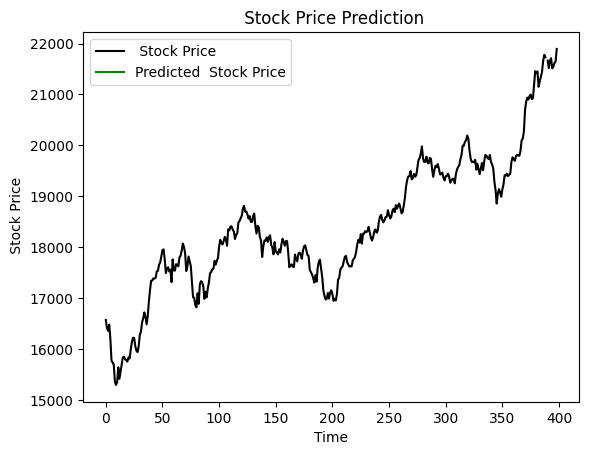

In [17]:
plt.plot(test_label[:,0], color = 'black', label = ' Stock Price')
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()